# Deep Learning Assignment 2
## Vishal Vijay Devadiga
## CS21BTECH11061

# Instructions

- Answer all questions. We encourage best coding practices by not penalizing (i.e. you may not get full marks if you make it difficult for us to understand. Hence, use intuitive names for the variables, and comment your code liberally. You may use the text cells in the notebook for briefly explaining the objective of a code cell.)
- It is expected that you work on these problems individually. If you have any doubts please contact the TA or the instructor no later than 2 days prior to the deadline.
- You may use built-in implementations only for the basic functions such as sqrt, log, etc. from libraries such as numpy or PyTorch. Other high-level functionalities are expected to be implemented by the students. (Individual problem statements will make this clear.)
- For plots, you may use matplotlib and generate clear plots that are complete and easy to understand.
- You are expected to submit the Python Notebooks saved as <your-roll-number>.ipynb
- If you are asked to report your observations, use the mark down text cells in the notebook.

In [1]:
# All imports and global variables
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn

# Set random seed
np.random.seed(42)
torch.manual_seed(42)

# Stuff used to simplify the code

(229, 224, 3)


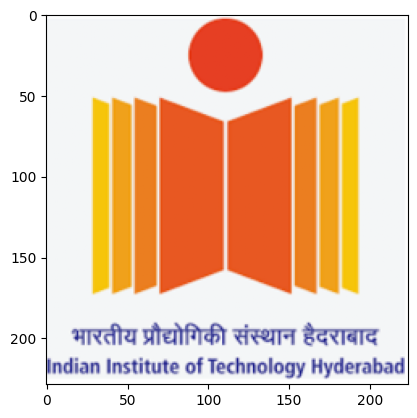

In [2]:
# Import IITH Logo
img = mpimg.imread('IITH_logo.png')
plt.imshow(img)
img = img[:, :,0:3]

print(img.shape)

(1148, 2380, 4)
(224, 224, 3)


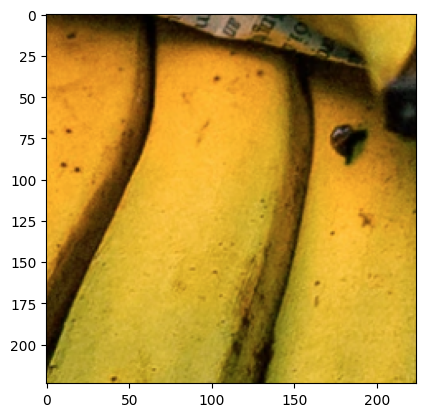

In [3]:
# Import bananas image from ILSVRC dataset
img2 = mpimg.imread('bananas.png')
plt.imshow(img2)

print(img2.shape)

# Reshape the banana image to 224x224x3
img2 = img2[700:924, 1000:1224, :]
img2 = img2[:, :,0:3]

plt.imshow(img2)
print(img2.shape)

In [4]:
# Activation Functions
# Also use numpy.nan_to_num to avoid NaN values

def sigmoid(x):
    return np.nan_to_num(1 / (1 + np.nan_to_num(np.exp(-x))))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    m = np.max(x)
    eX = np.exp(x - m)
    return np.nan_to_num(eX / np.sum(eX))

def tanh(x):
    return np.nan_to_num(np.tanh(x))

def Lrelu(x, alpha=0.01):
    return np.maximum(alpha*x, x)

# Pooling Functions

def max_pooling(x):
    return np.max(x)

def avg_pooling(x):
    return np.mean(x)

def min_pooling(x):
    return np.min(x)

In [5]:
# Some helper functions

def apply_padding(img, padding=(0, 0)):
    # Image size: (height, width, channels)
    # Padding: (height, width)
    tb_pad = np.zeros((img.shape[0], padding[1], img.shape[2]))
    img = np.concatenate((tb_pad, img, tb_pad), axis=1)
    lr_pad = np.zeros((padding[0], img.shape[1], img.shape[2]))
    img = np.concatenate((lr_pad, img, lr_pad), axis=0)
    return img

# Q1: Convolution function
It accepts an image input, a filter kernel, stride, padding, and the non-linear function.
The function must convolve the input image (after padding if specified) with the kernel (at the specified stride size) and generate an output activation after applying the specified non-linearity.
Verify with the standard options for the non-linear activation functions - sigmoid, tanh, ReLU, Leaky ReLU.
Display the input image (e.g. a small image of the IITH logo), the filter kernel, and the output activation map.
Ensure that your function can accept multi-channel input and a corresponding kernel volume

Marks = 5

# Q3: Convolution layer function
It accepts as input a volume (image or activation maps), number of filters, kernel dimensions, stride, padding, and the non-linear activation function.
The function must convolve the input volume (after padding if specified) with each kernel (at the specified stride size) and generate an output activation volume after applying the specified non-linearity.
Display the input image or activation maps, the filter kernels, and the output activation maps.
Verify that the output of this function does indeed have the expected size (W × H × C) as discussed in class.

Marks = 3

In [6]:
# Convolution Function
def convolve(img, kern, stride=(1,1), act_func=relu):
    # img: Image (height, width, channels)
    # kern: Kernel (height, width, channels)
    # stride: Stride of the kernel (height, width)
    # act_func: Activation function
    # Output size
    out_height = (img.shape[0] - kern.shape[0])//stride[0] + 1
    out_width = (img.shape[1] - kern.shape[1])//stride[1] + 1

    # Initialize the output
    output = np.zeros((out_height, out_width))

    # Convolution
    for k in range(kern.shape[2]):
        for i in range(0, img.shape[0] - kern.shape[0] + 1, stride[0]):
            for j in range(0, img.shape[1] - kern.shape[1] + 1, stride[1]):
                # Sum for all input channels
                output[i//stride[0], j//stride[1]] += np.sum(img[i:i+kern.shape[0], j:j+kern.shape[1], k] * kern[:, :, k])
        # Apply activation function
        output = act_func(output)
    return output

# Convolutional Layer

def conv_layer(img, kerns, stride=(1,1), padding=(0,0), act_func=relu):
    # img: Image (height, width, channels)
    # kerns: Kernels (height, width, channels, number of kernels)
    # stride: Stride of the kernel (height, width)
    # padding: Padding (height, width)
    # act_func: Activation function
    # Apply padding
    img = apply_padding(img, padding)
    # Output size
    out_height = (img.shape[0] - kerns.shape[0])//stride[0] + 1
    out_width = (img.shape[1] - kerns.shape[1])//stride[1] + 1
    out_channels = kerns.shape[3]
    # Initialize the output
    output = np.zeros((out_height, out_width, out_channels))

    # Convolution
    for k in range(out_channels):
        output[:, :, k] = convolve(img, kerns[:, :, :, k], stride, act_func)
    return output



In [7]:
# Initialize the kernels randomly

kerns = np.zeros((3, 3, 3, 3))

# Edge detection

kerns[:, :, 0, 0] = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kerns[:, :, 1, 0] = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
kerns[:, :, 2, 0] = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Horizontal edge detection

kerns[:, :, 0, 1] = np.array([[-1, -1, -1], [4, 4, 4], [-1, -1, -1]])
kerns[:, :, 1, 1] = np.array([[-1, -1, -1], [4, 4, 4], [-1, -1, -1]])
kerns[:, :, 2, 1] = np.array([[-1, -1, -1], [4, 4, 4], [-1, -1, -1]])

# Vertical edge detection

kerns[:, :, 0, 2] = np.array([[-1, 4, -1], [-1, 4, -1], [-1, 4, -1]])
kerns[:, :, 1, 2] = np.array([[-1, 4, -1], [-1, 4, -1], [-1, 4, -1]])
kerns[:, :, 2, 2] = np.array([[-1, 4, -1], [-1, 4, -1], [-1, 4, -1]])

# Apply the convolutional layer
# Padding is applied to the image to keep the output size same as the input size
conv_output = conv_layer(img, kerns, stride=(1,1), padding=(1,1), act_func=tanh)

# Note that the output size without channels is same as the input size without channels
print(img.shape)
print(conv_output.shape)

(229, 224, 3)
(229, 224, 3)


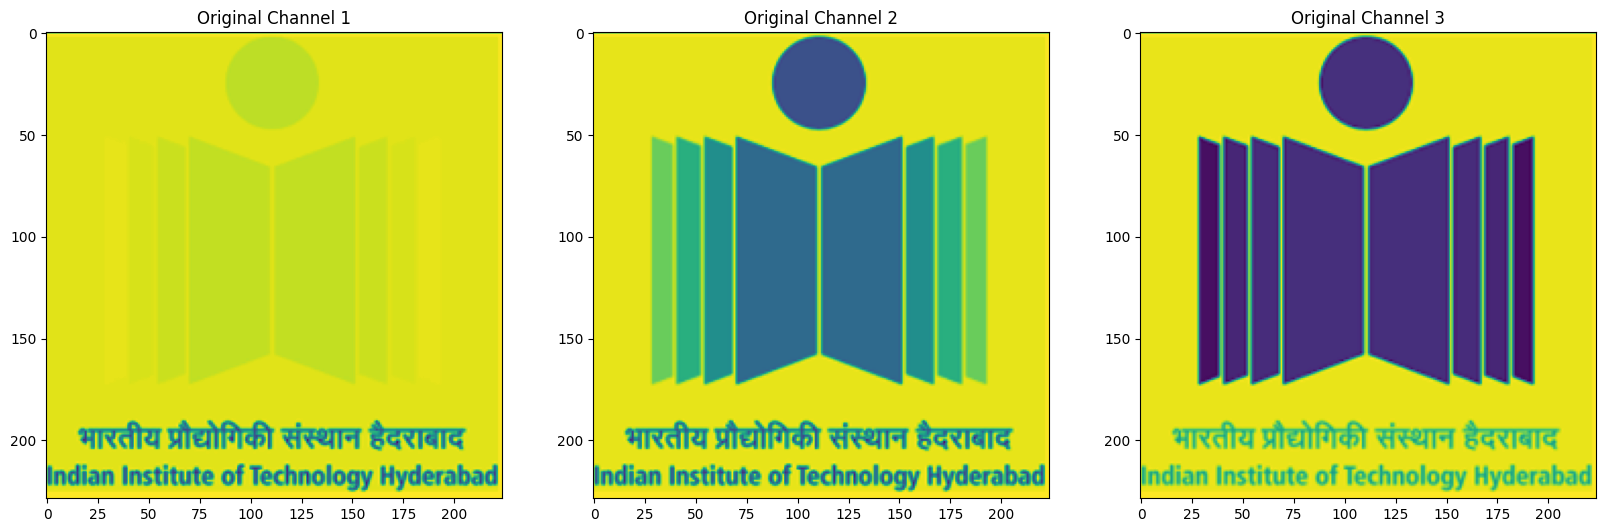

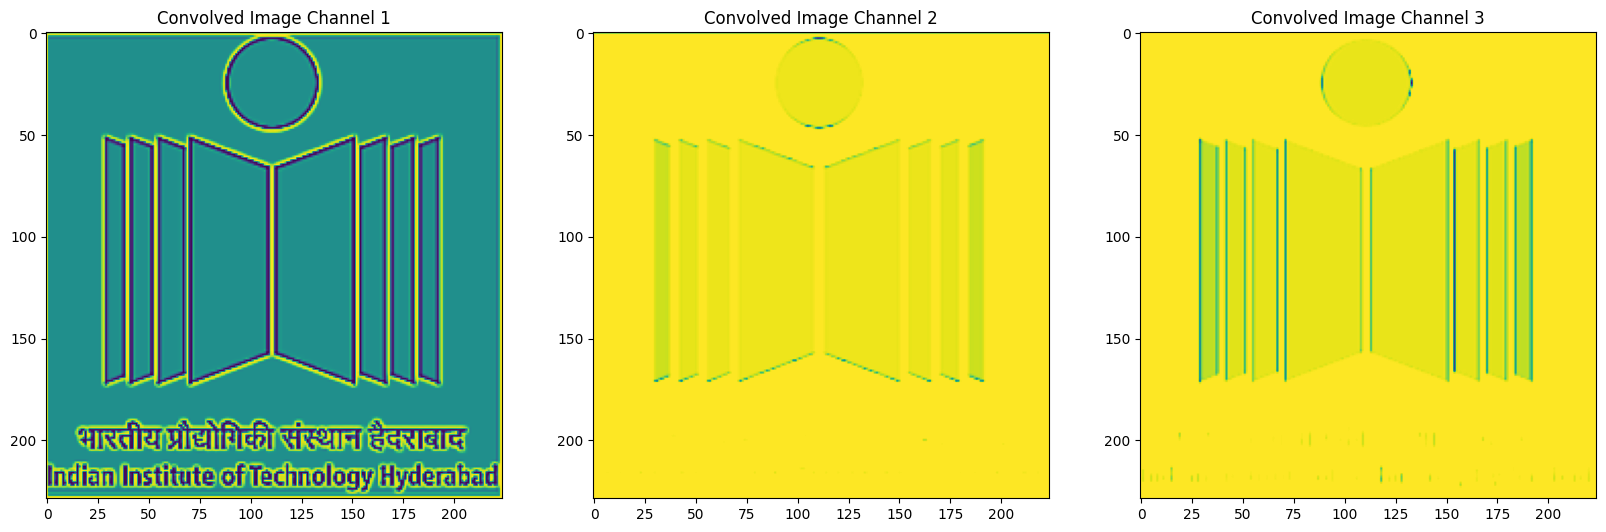

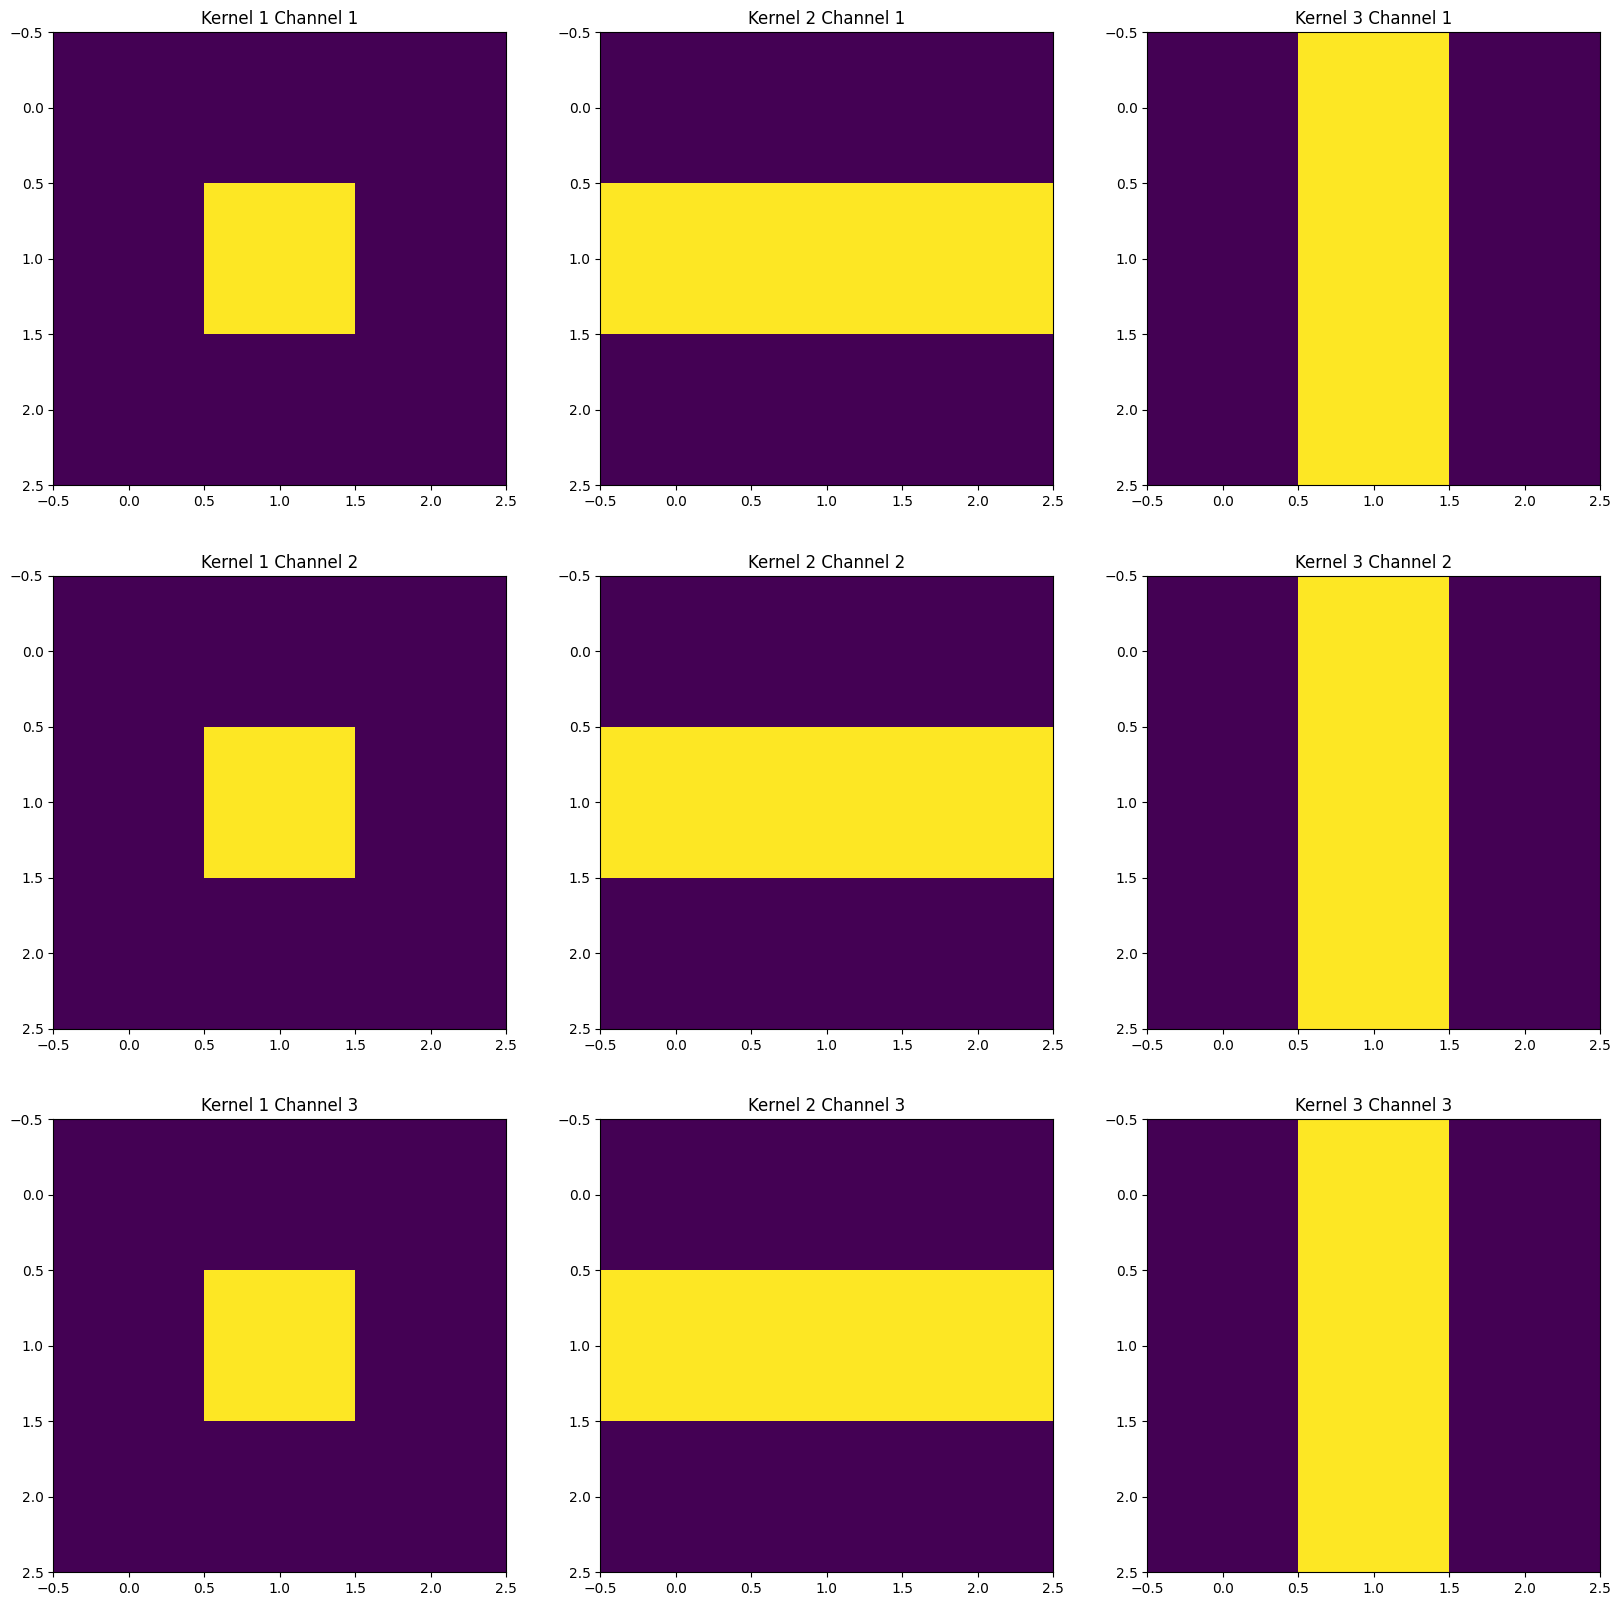

In [8]:
# Plot the input

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for i in range(3):
    ax[i].imshow(img[:, :, i])
    ax[i].set_title('Original Channel '+str(i+1))
plt.show()

# Plot the output

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for i in range(3):
    ax[i].imshow(conv_output[:, :, i])
    ax[i].set_title('Convolved Image Channel '+str(i+1))
plt.show()

# Kernels

fig, ax = plt.subplots(3, 3, figsize=(20, 20))
for i in range(3):
    for j in range(3):
        ax[i, j].imshow(kerns[:, :, i, j])
        ax[i, j].set_title('Kernel '+str(j+1)+' Channel '+str(i+1))
plt.show()

# Q2: Pooling function
It accepts as input the activation map output from the convolution function, a pooling function, and stride.
The function must output the appropriately pooled activation map.
Display the input activation map and the pooled output.

Marks = 2

# Q4: Pooling layer function
It accepts as input the activation map volume, the pooling function, stride, and generates a pooled output volume.
A special case for performing Global Average Pooling should also be provided.

Marks = 2

In [9]:
# Pooling function
def pool(img, stride=(1,1), pool_func=max_pooling):
    # img: Image (height, width)
    # stride: Stride of the kernel (height, width)
    # pool_func: Pooling function
    # Output size
    out_height = (img.shape[0])//stride[0]
    out_width = (img.shape[1])//stride[1]

    # Initialize the output
    output = np.zeros((out_height, out_width))

    # Pooling
    for i in range(0, img.shape[0] - stride[0] + 1, stride[0]):
        for j in range(0, img.shape[1] - stride[1] + 1, stride[1]):
            output[i//stride[0], j//stride[1]] = pool_func(img[i:i+stride[0], j:j+stride[1]])
    return output

# Pooling Layer

def pool_layer(img, stride=None, padding=(0,0), pool_func=max_pooling):
    # img: Image (height, width, channels)
    # stride: Stride of the kernel (height, width)
    # pool_func: Pooling function
    # Apply padding: Top-Bottom and Left-Right
    img = apply_padding(img, padding)

    # If stride is not given, consider Global Pooling
    if stride is None:
        stride = (img.shape[0], img.shape[1])

    # Output size
    out_height = (img.shape[0])//stride[0]
    out_width = (img.shape[1])//stride[1]
    out_channels = img.shape[2]

    # Initialize the output
    output = np.zeros((out_height, out_width, out_channels))

    # Pooling
    for k in range(out_channels):
        output[:, :, k] = pool(img[:, :, k], stride, pool_func)
    return output

In [10]:
# Max Pooling
pool_output = pool_layer(conv_output, stride=(2,2), padding=(0,0), pool_func=max_pooling)
# Global Average Pooling
gap_output = pool_layer(conv_output, padding=(0,0), pool_func=avg_pooling)

print(pool_output.shape)
print(gap_output.shape)

(114, 112, 3)
(1, 1, 3)


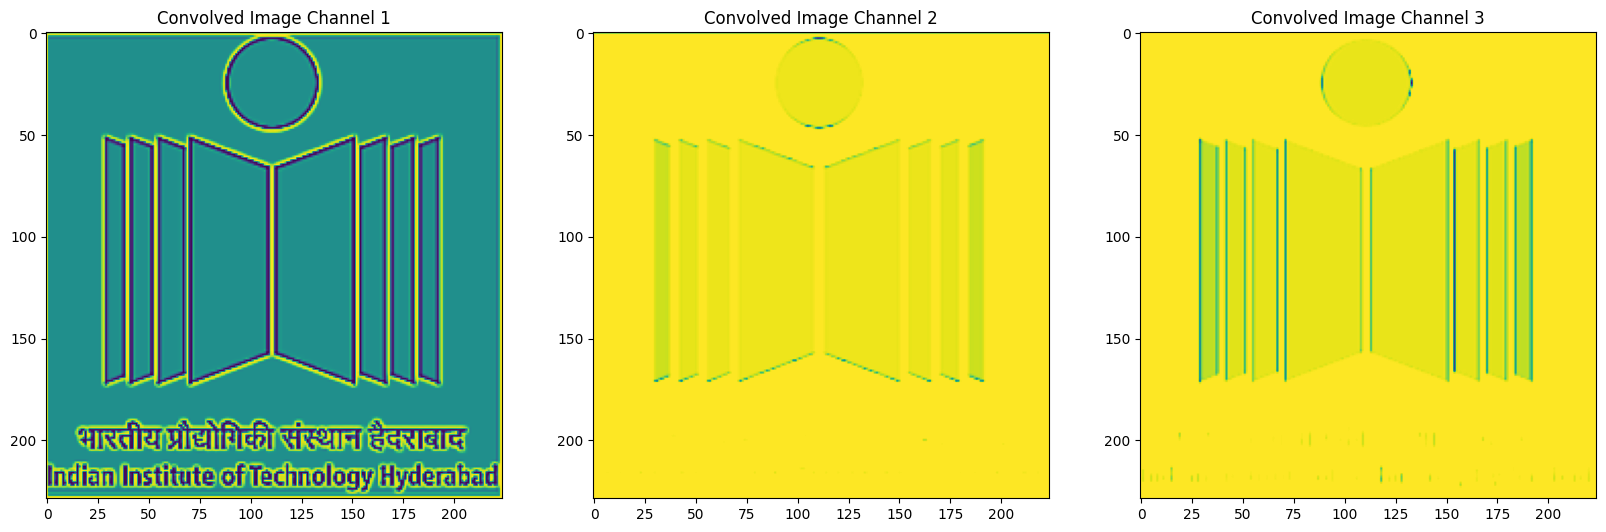

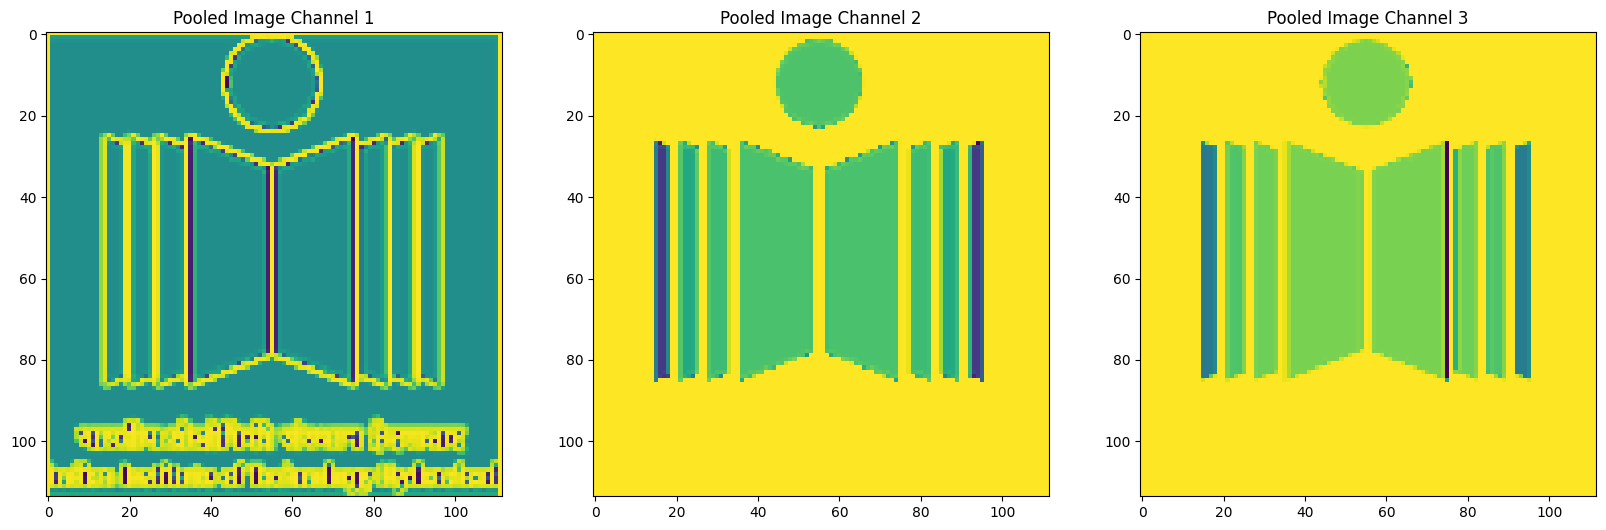

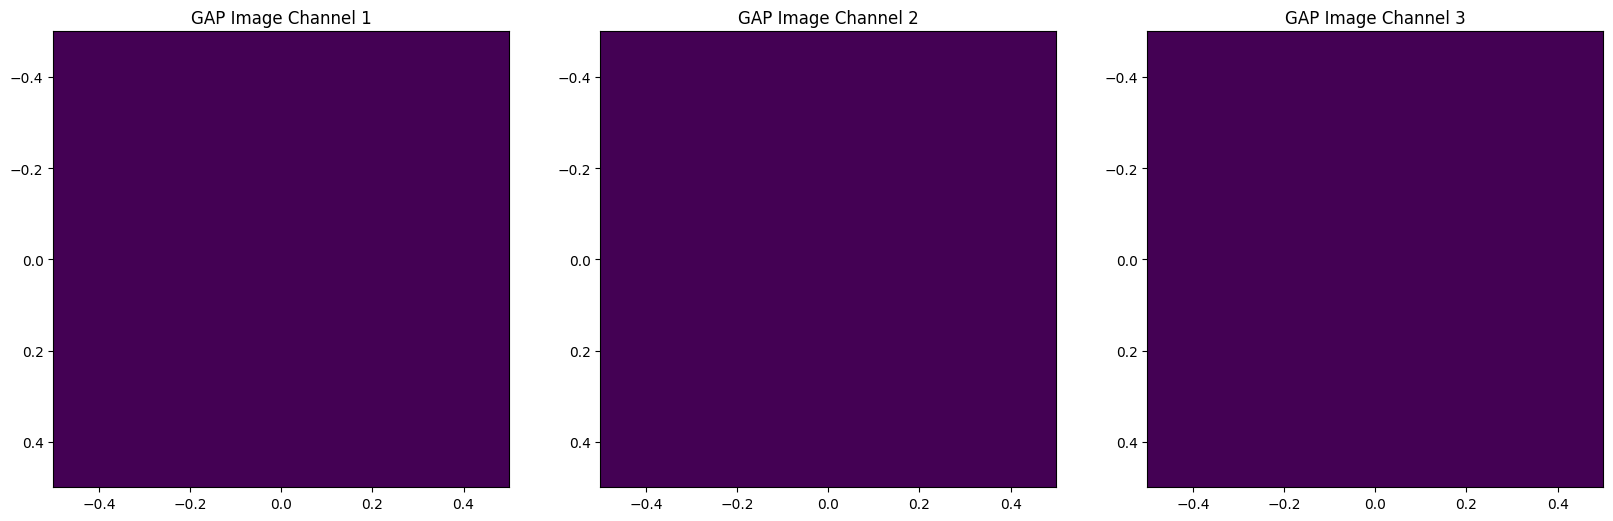

In [11]:
# Plot the Input
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for i in range(3):
    ax[i].imshow(conv_output[:, :, i])
    ax[i].set_title('Convolved Image Channel '+str(i+1))


# Plot the output
fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for i in range(3):
    ax[i].imshow(pool_output[:, :, i])
    ax[i].set_title('Pooled Image Channel '+str(i+1))
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(20, 20))
for i in range(3):
    ax[i].imshow(gap_output[:, :, i])
    ax[i].set_title('GAP Image Channel '+str(i+1))

# 5: Multilayer Perceptron (MLP) function
It accepts as input a vector, the number of hidden layers, the size of each hidden layer, the non-linear function, and the size of the output layer.
This function should generate an output vector of the specified size.
Generate the output with and without the softmax function applied to the output layer.

Marks = 3

In [12]:
def MLP(x, num_hidden = 0, hidden_units = [], num_classes = 10, act_func = relu, out_act_func = softmax):
    # x: Input
    # num_hidden: Number of hidden layers
    # hidden_units: Number of units in each hidden layer
    # num_classes: Number of classes
    # act_func: Activation function
    # Input size
    input_size = x.shape[0]

    # Initialize the weights and biases
    weights = []
    biases = []

    for i in range(num_hidden+1):
        if i == 0:
            weights.append(np.random.randn(input_size, hidden_units[i]))
            biases.append(np.random.randn(hidden_units[i], 1))
        elif i == num_hidden:
            weights.append(np.random.randn(hidden_units[i-1], num_classes))
            biases.append(np.random.randn(num_classes, 1))
        else:
            weights.append(np.random.randn(hidden_units[i-1], hidden_units[i]))
            biases.append(np.random.randn(hidden_units[i], 1))

    w = weights
    b = biases

    # Forward Pass
    for i in range(num_hidden+1):
        if i == num_hidden:
            y_pred_without_softmax = np.dot(w[i].T, h) + b[i]
            y_pred_with_softmax = out_act_func(y_pred_without_softmax)
        else:
            if i == 0:
                a = np.dot(w[i].T, x) + b[i]
            else:
                a = np.dot(w[i].T, h) + b[i]
            h = act_func(a)

    return y_pred_with_softmax, y_pred_without_softmax

In [13]:
# Test the MLP

# X is a random input
x = np.random.randn(10, 1)
y_pred_with_softmax, y_pred_without_softmax = MLP(x, num_hidden=2, hidden_units=[25, 5], num_classes=3, act_func=relu, out_act_func=softmax)

# Print the shapes
print(y_pred_with_softmax.shape)
print(y_pred_without_softmax.shape)

# Print the outputs
print ("Without softmax: ", y_pred_without_softmax)
print ("With softmax: ", y_pred_with_softmax)

# Print the sum of probabilities
print("Sum of probabilities: ", np.sum(y_pred_with_softmax))

(3, 1)
(3, 1)
Without softmax:  [[ 28.32479221]
 [ 41.9095947 ]
 [-32.16422164]]
With softmax:  [[1.25948992e-06]
 [9.99998741e-01]
 [6.76316158e-33]]
Sum of probabilities:  0.9999999999999999


# 6: Putting-it all together
Finally, use the functions you have written to implement a CNN with the following architecture. The CNN must accept an image input and output a vector of appropriate dimension. In other words, the function must effectively implement the feed-forward path in a CNN:

- Input image of size 224×224×3. Use validation images (or, random crops) from the ILSVRC
dataset.
- Convolution layer with 16 kernels of size 5 ×5 spatial dimensions and ReLU activation.
- Max pooling layer of size 2 ×2 with a stride of 2 along each dimension.
- Convolution layer with 32 kernels of spatial size 3 ×3 and sigmoid activation.
- Max pooling layer of size 2 ×2 with a stride of 2 along each dimension.
- A Global Average Pooling (GAP) layer.
- An MLP with one hidden layer (size same as input) that accepts as input the previous layer’s output and maps it to 1000 output nodes. Use ReLU activation for the MLP (softmax in the o/p layer).

Verify that your composition of function accepts and image input and outputs a vector.

Marks = 5

In [29]:
def CNN(x):
    # x: Input, size (height, width, channels) = (224, 224, 3)

    # Convolutional Layer 1
    kerns1 = np.random.randn(5, 5, 3, 16)
    conv_output1 = conv_layer(x, kerns1, stride=(1,1), padding=(2,2), act_func=relu)
    print(conv_output1.shape)

    # Pooling Layer 1
    pool_output1 = pool_layer(conv_output1, stride=(2,2), padding=(0,0), pool_func=max_pooling)
    print(pool_output1.shape)

    # Convolutional Layer 2
    kerns2 = np.random.randn(3,3,16,32)
    conv_output2 = conv_layer(pool_output1, kerns2, stride=(1,1), padding=(1,1), act_func=sigmoid)
    print(conv_output2.shape)

    # Pooling Layer 2
    pool_output2 = pool_layer(conv_output2, stride=(2,2), padding=(0,0), pool_func=max_pooling)
    print(pool_output2.shape)
    

    # Global Average Pooling
    gap_output = pool_layer(pool_output2, padding=(0,0), pool_func=avg_pooling)
    print(gap_output.shape)

    # gap_output is of size (1, 1, 32)
    gap_output = gap_output.reshape((32, 1))

    # MLP
    y_pred_with_softmax, y_pred_without_softmax = MLP(gap_output, num_hidden=1, hidden_units=[32], num_classes=1000, act_func=relu, out_act_func=softmax)

    # Return the output
    return y_pred_with_softmax, y_pred_without_softmax

In [30]:
# Test the CNN

# X is the banana image
x = img2
y_pred_with_softmax, y_pred_without_softmax = CNN(x)

# Print the shapes
print(y_pred_with_softmax.shape)
print(y_pred_without_softmax.shape)

(224, 224, 16)
(112, 112, 16)
(112, 112, 32)
(56, 56, 32)
(1, 1, 32)
(1000, 1)
(1000, 1)


In [16]:
# Print the outputs
print ("Without softmax: ", y_pred_without_softmax)
print ("With softmax: ", y_pred_with_softmax)

# Sum of probabilities
print("Sum of probabilities: ", np.sum(y_pred_with_softmax))

Without softmax:  [[ 9.03159126e+00]
 [-8.53747165e+00]
 [-6.98060325e+00]
 [ 4.69458790e+00]
 [-1.05352466e+01]
 [ 6.94557308e+00]
 [-7.29750046e+00]
 [-1.01783946e+01]
 [ 3.25116490e+00]
 [-3.83204908e+00]
 [-1.42766312e+01]
 [ 2.20324081e+01]
 [-1.31548378e+01]
 [-6.41641972e+00]
 [-6.81188142e+00]
 [-4.94023811e+00]
 [-4.08121542e+00]
 [ 1.35531781e+01]
 [-6.07337580e+00]
 [ 1.05557850e+01]
 [ 2.59759608e+01]
 [-4.21189180e+00]
 [-5.82925801e+00]
 [ 1.04938443e+01]
 [ 1.38366867e+01]
 [ 8.50338619e+00]
 [ 9.10085723e+00]
 [ 5.02242729e+00]
 [ 1.33418732e+01]
 [-1.08190592e+01]
 [ 1.57984847e+01]
 [-3.33925429e+00]
 [ 1.65583326e+00]
 [-7.39840785e+00]
 [-6.98114484e-02]
 [-1.14890151e+00]
 [ 2.20278639e+01]
 [-2.25717645e-01]
 [-4.63140860e+00]
 [-2.45630714e+00]
 [ 5.25276733e-01]
 [ 2.72140332e+01]
 [ 7.00514731e+00]
 [-1.51571475e+01]
 [-7.05762233e+00]
 [-4.61913122e+00]
 [-2.56195549e-02]
 [-9.54622405e+00]
 [ 3.99032756e+00]
 [ 3.93214329e+00]
 [ 2.14894032e+01]
 [-6.29435376

# 7: The adding problem
In this task, each data sample consists of a sequence of variable length, but a constant depth (size of feature vector at each time instance) of 2.
All values of the first dimension (randomly) lie in [0,1], and the second dimension is all zeros except for two elements that are marked by 1.
The objective of the task is to sum the random values whose second dimensions are marked by 1.

- Train the different RNNs (Elmon network, LSTM, and GRU) discussed in the class and compare their performance against a baseline that always predicts a sum of 1 plotting the learning curves and final performance.
- Note that you are expected to implement these models (as opposed to using the built-in constructs).

The following table presents two data samples (x) along with their labels (y).
Note that the samples should be of different lengths (n), so the dimensions of each sample can be represented as n×2.
Given examples have lengths of 5 and 8 respectively.
You have to generate/create a big dataset (≥5000) of such samples for training and testing of the RNNs

![Table](./Table.png)

Marks = [3 (Elmon) + 7 (LSTM) + 4 (GRU)+ 6 (Dataset & baseline & comparison) = 20]

In [17]:
# Creating the Dataset

def create_dataset(len_min, len_max, num_samples=1000):
    # len_min: Minimum length of the sequence
    # len_max: Maximum length of the sequence
    # num_samples: Number of samples
    X = []
    Y = torch.zeros(num_samples, dtype=torch.float32)

    for i in range(num_samples):
        # Random length
        len = np.random.randint(len_min, len_max)
        # Values in x lie in [0,1)
        x = np.random.rand(len)
        y = np.zeros(len, dtype=int)
        # Randomly select two positions
        one_pos = np.random.choice(len, size=2, replace=False)

        y[one_pos[0]] = 1
        y[one_pos[1]] = 1

        # Find sum of the values at the selected positions
        sum = x[one_pos[0]] + x[one_pos[1]]

        # Combine x and y

        xy = np.concatenate((x.reshape(-1,1), y.reshape(-1, 1)), axis=1)
        xy_torch = torch.tensor(xy, dtype=torch.float32)
        X.append(xy_torch)
        Y[i] = sum
    return X, Y

In [18]:
# Create dataset
X,y = create_dataset(2, 10, 5000)
print(X[0])
print(y[0])

tensor([[0.5973, 0.0000],
        [0.2711, 1.0000],
        [0.9576, 1.0000]])
tensor(1.2287)


# Elmon RNN

For a elmon RNN, we will use the following equations:

- $h_t = \sigma_h(W_{ih}x_t + b_{ih} + W_{hh}h_{t-1} + b_{hh})$
- $y_t = \sigma_y(W_{hy}h_t + b_{hy})$

where:

- $h_t$ is the hidden state vector
- $x_t$ is the input vector
- $y_t$ is the output vector
- $W_{ih}$, $W_{hh}$, $W_{hy}$ are the weight matrices
- $b_{ih}$, $b_{hh}$, $b_{hy}$ are the bias vectors
- $\sigma_h$ and $\sigma_y$ are the activation functions

In [19]:
# Elmon RNN

class ElmonRNN(nn.Module):
    # Init function
    def __init__(self, input_size, hidden_size, output_size):
        # input_size: Input size
        # hidden_size: Hidden size
        # output_size: Output size
        super(ElmonRNN, self).__init__()

        # Hidden size
        self.hidden_size = hidden_size

        # Weights and biases
        self.x2h = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.h2o = nn.Linear(hidden_size, output_size, bias = True)

        # Activation Functions
        self.sigg = nn.Sigmoid()
        self.sigh = nn.Tanh()

    # Forward Pass
    def forward(self, input, hidden):
        # input: Input at time step t
        # hidden: Hidden state at time step t-1

        # Combine input and hidden state
        combined = torch.cat((input, hidden), 1)

        # 1. Update the hidden state
        hidden = self.sigh(self.x2h(combined))

        # 2. Calculate the output
        output = self.h2o(hidden)

        # Return the output and hidden state
        return output, hidden

    # Train Sequence
    def train_seq(self, input_seq, target_seq, criterion, optimizer):
        # input_seq: Input sequence, is of the shape (seq_len, 2)
        # target_seq: Target sequence, is of the shape (seq_len, 1)
        # criterion: Loss function
        # optimizer: Optimizer

        # Initialize the gradients
        optimizer.zero_grad()

        # Initialize the hidden state
        hidden = torch.zeros(1, self.hidden_size)

        # For each time step, forward pass
        for i in range(input_seq.size(0)):
            temp = torch.reshape(input_seq[i], (1, 2))
            output, hidden = self.forward(temp, hidden)

        # Calculate the loss
        loss = criterion(output, target_seq)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()

        # Return the output and loss
        return output, loss

    def train(self, epoch, input_seq, target_seq, criterion, optimizer, logs=False):
        # epoch: Number of epochs
        # input_seq: Input sequence, is a list of tensors
        # target_seq: Target sequence, is a list of tensors
        # criterion: Loss function
        # optimizer: Optimizer
        # logs: Print loss if True
        loss_list = []
        for i in range(epoch):
            # Initialize loss
            t_loss = 0
            for j in range(len(input_seq)):
                output, loss = self.train_seq(input_seq[j], target_seq[j], criterion, optimizer)
                t_loss += loss.item()
            # Average loss
            t_loss = t_loss/len(input_seq)
            loss_list.append(t_loss)
            if logs:
                print("Epoch: ", i, "Loss: ", t_loss)
        return output, loss_list

# LSTM RNN

For a LSTM RNN, we will use the following equations:

- $i_t = \sigma_g(W_{ii}x_t + b_{ii} + W_{hi}h_{t-1} + b_{hi})$
- $f_t = \sigma_g(W_{if}x_t + b_{if} + W_{hf}h_{t-1} + b_{hf})$
- $o_t = \sigma_g(W_{io}x_t + b_{io} + W_{ho}h_{t-1} + b_{ho})$
- $\tilde{c}_t = \sigma_g(W_{ig}x_t + b_{ig} + W_{hg}h_{t-1} + b_{hg})$
- $c_t = f_t \odot c_{t-1} + i_t \odot \tilde{c}_t$
- $h_t = o_t \odot \sigma_h(c_t)$

where:

- $i_t$ is the input gate
- $f_t$ is the forget gate
- $o_t$ is the output gate
- $\tilde{c}_t$ is the candidate value
- $c_t$ is the cell state
- $h_t$ is the hidden state
- $x_t$ is the input vector
- $W_{ii}$, $W_{hi}$, $W_{if}$, $W_{hf}$, $W_{io}$, $W_{ho}$, $W_{ig}$, $W_{hg}$ are the weight matrices
- $b_{ii}$, $b_{hi}$, $b_{if}$, $b_{hf}$, $b_{io}$, $b_{ho}$, $b_{ig}$, $b_{hg}$ are the bias vectors
- $\sigma_g$ and $\sigma_h$ are the activation functions
- $\odot$ is the element-wise multiplication

In [20]:
# LSTM RNN

class LSTMRNN(nn.Module):
    # Init function
    def __init__(self, input_size, hidden_size, output_size):
        # input_size: Input size
        # hidden_size: Hidden size
        # output_size: Output size
        super(LSTMRNN, self).__init__()

        # Hidden Size
        self.hidden_size = hidden_size

        # Weights and Biases
        self.x2f = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.x2i = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.x2o = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.x2ctil = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.h2y = nn.Linear(hidden_size, output_size, bias = True)

        # Activation Functions
        self.sigg = nn.Sigmoid()
        self.sigh = nn.Tanh()

    # Forward Pass
    def forward(self, input, hidden, cell):
        # input: Input at time t
        # hidden: Hidden state at time t-1
        # cell: Cell state at time t-1

        # combined: Concatenation of input and hidden state
        combined = torch.cat((input, hidden), 1)

        # 1. Forget Gate
        f = self.sigg(self.x2f(combined))

        # 2. Input Gate
        i = self.sigg(self.x2i(combined))

        # 3. Output Gate
        o = self.sigg(self.x2o(combined))

        # 4. Candidate Cell State
        ctil = self.sigh(self.x2ctil(combined))

        # 5. Cell State
        cell = f*cell + i*ctil

        # 6. Hidden State
        hidden = o*self.sigh(cell)

        # 7. Output
        output = self.h2y(hidden)
        return output, hidden, cell

    # Train Sequence
    def train_seq(self, input_seq, target_seq, criterion, optimizer):
        # input_seq: Input sequence, is of the shape (seq_len, 2)
        # target_seq: Target sequence, is of the shape (seq_len, 1)
        # criterion: Loss function
        # optimizer: Optimizer

        # Initialize the gradients
        optimizer.zero_grad()

        # Initialize hidden and cell states
        hidden = torch.zeros(1, self.hidden_size)
        cell = torch.zeros(1, self.hidden_size)

        # For each time step, forward pass
        for i in range(input_seq.size(0)):
            temp = torch.reshape(input_seq[i], (1, 2))
            output, hidden, cell = self.forward(temp, hidden, cell)

        # Calculate loss
        loss = criterion(output, target_seq)

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

        # Return output and loss
        return output, loss

    # Train
    def train(self, epoch, input_seq, target_seq, criterion, optimizer, logs=False):
        # Epoch: Number of epochs
        # input_seq: Input sequence, is a list of tensors
        # target_seq: Target sequence, is a list of tensors
        # criterion: Loss function
        # optimizer: Optimizer
        # logs: Print loss if True
        loss_list = []
        for i in range(epoch):
            # Initialize loss
            t_loss = 0
            for j in range(len(input_seq)):
                output, loss = self.train_seq(input_seq[j], target_seq[j], criterion, optimizer)
                t_loss += loss.item()
            # Average loss
            t_loss = t_loss/len(input_seq)
            loss_list.append(t_loss)
            if logs:
                print("Epoch: ", i, "Loss: ", t_loss)
        return output, loss_list

# GRU RNN

For a GRU RNN, we will use the following equations:

- $z_t = \sigma_g(W_{iz}x_t + b_{iz} + W_{hz}h_{t-1} + b_{hz})$
- $r_t = \sigma_g(W_{ir}x_t + b_{ir} + W_{hr}h_{t-1} + b_{hr})$
- $\hat{h}_t = \sigma_h(W_{ih}x_t + b_{ih} + r_t \odot (W_{hh}h_{t-1} + b_{hh}))$
- $h_t = (1 - z_t) \odot h_{t-1} + z_t \odot \hat{h}_t$

where:

- $z_t$ is the update gate
- $r_t$ is the reset gate
- $\hat{h}_t$ is the candidate activation
- $h_t$ is the hidden state
- $x_t$ is the input vector
- $W_{iz}$, $W_{hz}$, $W_{ir}$, $W_{hr}$, $W_{ih}$, $W_{hh}$ are the weight matrices
- $b_{iz}$, $b_{hz}$, $b_{ir}$, $b_{hr}$, $b_{ih}$, $b_{hh}$ are the bias vectors
- $\sigma_g$ and $\sigma_h$ are the activation functions

In [21]:
# GRU RNN

class GRURNN(nn.Module):
    # Init function
    def __init__(self, input_size, hidden_size, output_size):
        # input_size: Input size
        # hidden_size: Hidden size
        # output_size: Output size
        super(GRURNN, self).__init__()

        # Hidden Size
        self.hidden_size = hidden_size

        # Weight and Bias Initialization
        self.x2z = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.x2r = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.x2h = nn.Linear(input_size + hidden_size, hidden_size, bias = True)
        self.h2o = nn.Linear(hidden_size, output_size, bias = True)

        # Activation Functions
        self.sigg = nn.Sigmoid()
        self.sigh = nn.Tanh()

    # Forward Pass
    def forward(self, input, hidden):
        # input: Input at time t
        # hidden: Hidden state at time t-1

        # 1. Concatenate input and hidden state
        combined = torch.cat((input, hidden), 1)

        # 2. Update Gates
        z = self.sigg(self.x2z(combined))
        r = self.sigg(self.x2r(combined))

        # 3. Candidate Hidden State
        combined = torch.cat((input, r*hidden), 1)
        htil = self.sigh(self.x2h(combined))

        # 4. Hidden State
        hidden = (1-z)*htil + z*hidden

        # 5. Output
        output = self.h2o(hidden)
        return output, hidden

    # Train Sequence
    def train_seq(self, input_seq, target_seq, criterion, optimizer):
        # input_seq: Input sequence, is of the shape (seq_len, 2)
        # target_seq: Target sequence, is of the shape (seq_len, 1)
        # criterion: Loss function
        # optimizer: Optimizer

        # Initialize the optimizer
        optimizer.zero_grad()

        # Initialize the hidden state
        hidden = torch.zeros(1, self.hidden_size)

        # For each time step, forward pass
        for i in range(input_seq.size(0)):
            temp = torch.reshape(input_seq[i], (1,2))
            output, hidden = self.forward(temp, hidden)

        # Calculate the loss
        loss = criterion(output, target_seq)

        # Backward pass
        loss.backward()

        # Update the weights
        optimizer.step()
        return output, loss

    # Train
    def train(self, epoch, input_seq, target_seq, criterion, optimizer, logs=False):
        # Epoch: Number of epochs
        # input_seq: Input sequence, is a list of tensors
        # target_seq: Target sequence, is a list of tensors
        # criterion: Loss function
        # optimizer: Optimizer
        # logs: Print loss if True
        loss_list = []
        for i in range(epoch):
            # Initialize the loss
            t_loss = 0
            for j in range(len(input_seq)):
                output, loss = self.train_seq(input_seq[j], target_seq[j], criterion, optimizer)
                t_loss += loss.item()

            # Average loss
            t_loss = t_loss/len(input_seq)
            loss_list.append(t_loss)
            if logs:
                print("Epoch: ", i, "Loss: ", t_loss)
        return output, loss_list

In [22]:
# Function to run the model
def run_model(model, epoch, input_X, target_Y, criterion, optimizer, learn_rate=0.01):
    optimizer = torch.optim.Adam(model.parameters(), lr=learn_rate)
    output, loss = model.train(epoch, input_X, target_Y, criterion, optimizer, logs=True)
    return output, loss

# Function to plot training loss vs epochs
def plot_graphs(losses, title):
    plt.plot(losses)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.xscale('linear')
    plt.yscale('log')
    plt.show()

In [23]:
# Run the models

input_size = 2
hidden_size = 5
output_size = 1
epoch = 20
input_seq = X
target_seq = torch.tensor(y, dtype=torch.float32)
criterion = nn.MSELoss()
learn_rate = 0.01

/tmp/ipykernel_24409/2038892157.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_seq = torch.tensor(y, dtype=torch.float32)


/home/corvus/Work/.venv/lib64/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0 Loss:  0.08401223369705461
Epoch:  1 Loss:  0.018798347407201633
Epoch:  2 Loss:  0.015825054870484596
Epoch:  3 Loss:  0.014465290944050989
Epoch:  4 Loss:  0.013701605922925953
Epoch:  5 Loss:  0.013507566889738623
Epoch:  6 Loss:  0.013535921545996886
Epoch:  7 Loss:  0.012993827959609027
Epoch:  8 Loss:  0.012984257923912845
Epoch:  9 Loss:  0.013159367590512429
Epoch:  10 Loss:  0.013108645868042631
Epoch:  11 Loss:  0.013112529125981882
Epoch:  12 Loss:  0.013149570339812303
Epoch:  13 Loss:  0.013116380659310404
Epoch:  14 Loss:  0.013029803402103857
Epoch:  15 Loss:  0.01310429173118275
Epoch:  16 Loss:  0.012940787718062167
Epoch:  17 Loss:  0.01302171053303731
Epoch:  18 Loss:  0.013099153986584176
Epoch:  19 Loss:  0.013056665340523011


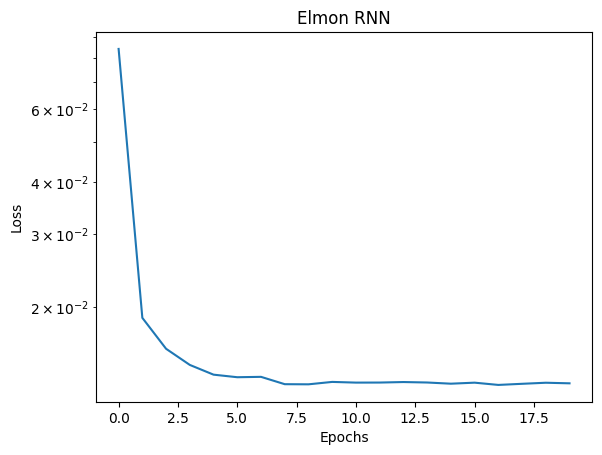

In [24]:
# Elmon RNN

elmon_rnn = ElmonRNN(input_size, hidden_size, output_size)
output, elmon_loss = run_model(elmon_rnn, epoch, input_seq, target_seq, criterion, learn_rate)
plot_graphs(elmon_loss, 'Elmon RNN')

Epoch:  0 Loss:  0.024390054006759098
Epoch:  1 Loss:  0.001357980266387939
Epoch:  2 Loss:  0.0007966704506927323
Epoch:  3 Loss:  0.0005934276422396435
Epoch:  4 Loss:  0.00047648175529293394
Epoch:  5 Loss:  0.0003961509877687897
Epoch:  6 Loss:  0.0003452345573337219
Epoch:  7 Loss:  0.0003020301562539334
Epoch:  8 Loss:  0.00025891466214948195
Epoch:  9 Loss:  0.00022749627581966595
Epoch:  10 Loss:  0.0002061756907853516
Epoch:  11 Loss:  0.00018993479488407948
Epoch:  12 Loss:  0.0001679917195900412
Epoch:  13 Loss:  0.00015649943907950306
Epoch:  14 Loss:  0.00014790282386177437
Epoch:  15 Loss:  0.00014207228334936505
Epoch:  16 Loss:  0.0001359919574164025
Epoch:  17 Loss:  0.00013165354701303632
Epoch:  18 Loss:  0.00012910275797498407
Epoch:  19 Loss:  0.00012563520261478614


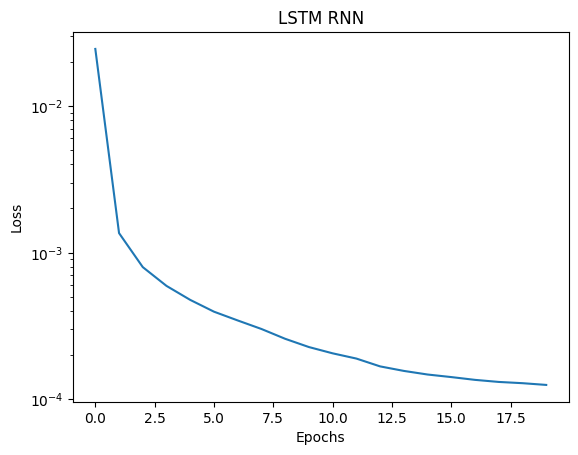

In [25]:
# LSTM RNN

lstm_rnn = LSTMRNN(input_size, hidden_size, output_size)
output, lstm_loss = run_model(lstm_rnn, epoch, input_seq, target_seq, criterion, learn_rate)
plot_graphs(lstm_loss, 'LSTM RNN')

Epoch:  0 Loss:  0.016032287228693813
Epoch:  1 Loss:  0.0009674443171352729
Epoch:  2 Loss:  0.0007348085545144708
Epoch:  3 Loss:  0.0006434867454625484
Epoch:  4 Loss:  0.00047756985907492096
Epoch:  5 Loss:  0.00036519619760800367
Epoch:  6 Loss:  0.00033880968397457
Epoch:  7 Loss:  0.0003024482555029973
Epoch:  8 Loss:  0.00028064428610729506
Epoch:  9 Loss:  0.0002685973133786604
Epoch:  10 Loss:  0.00025665154226392863
Epoch:  11 Loss:  0.00024752712047002506
Epoch:  12 Loss:  0.00023253302300120214
Epoch:  13 Loss:  0.00022263051884701516
Epoch:  14 Loss:  0.0002124517105095237
Epoch:  15 Loss:  0.00020603085073238732
Epoch:  16 Loss:  0.00020771625226763515
Epoch:  17 Loss:  0.0001964765133777766
Epoch:  18 Loss:  0.00019076015066530857
Epoch:  19 Loss:  0.000194399322918113


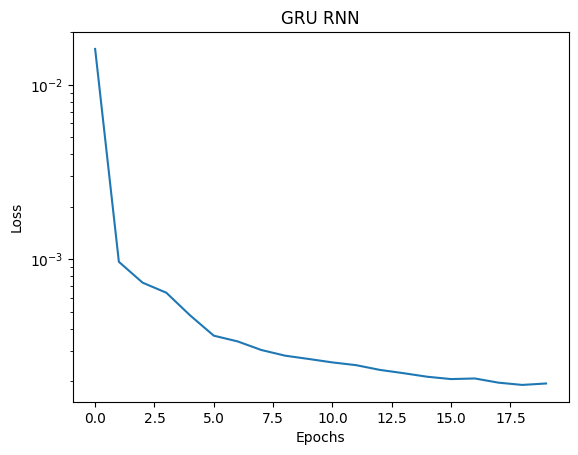

In [26]:
# GRU RNN

gru_rnn = GRURNN(input_size, hidden_size, output_size)
output, gru_loss = run_model(gru_rnn, epoch, input_seq, target_seq, criterion, learn_rate)
plot_graphs(gru_loss, 'GRU RNN')

In [27]:
# Baseline Model

y_pred = torch.ones(len(y))
base_loss = criterion(y_pred, target_seq)
print("Baseline Loss: ", base_loss.item())

Baseline Loss:  0.16518212854862213


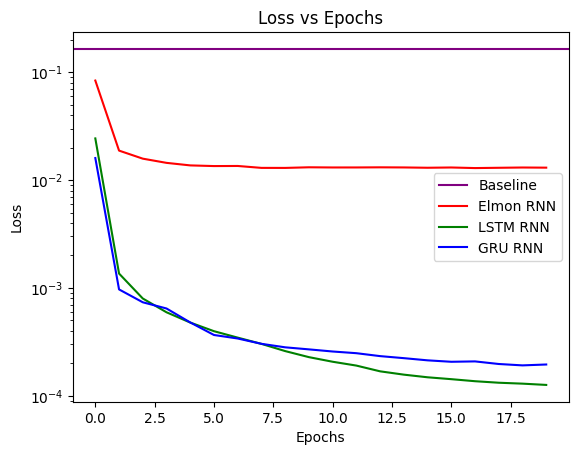

In [28]:
# Plot all the graphs together

plt.axhline(y=base_loss, label='Baseline', color='purple')
plt.plot(elmon_loss, label='Elmon RNN', color='red')
plt.plot(lstm_loss, label='LSTM RNN', color='green')
plt.plot(gru_loss, label='GRU RNN', color='blue')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xscale('linear')
plt.yscale('log')
plt.show()